# ECS7024 Statistics for Artificial Intelligence and Data Science

# Sample Answer for Coursework 1

*Note 1: This notebook contains a possible answer to the first coursework. **However, it includes material that was not required**. In addition, many variations and alternatives exist and not all good answers need be the same. Notes, such as this one, are written in italics.*

*Note 2: The notebook is written in a style that generally does not refer to the coursework instructions, instead presenting the analysis steps as though they were the idea of the report's author. It is accepted that students may not write in this style since quite detailed instructions were given.*

**Table of Contents**

1. Section 1: Introduction
  * Section 1.1: Outline
  * Section 1.2: Loading the Data
2. Section 2: Morning and Evening Peak Proportions
  * Section 2.1: Peak Hours
  * Section 2.2: Calculating Measures to Compare the AM and PM Peaks
3. Section 3: Distributions of Peak Exits 
  * Section 3.1: Distributions and Summary Statistics
  * Section 3.2: Analysis of Distributions
  * Section 3.3: Exploring Stations Groups
4. Section 4: Classification of Stations
  * Section 4.1: Implementing a Simple Classification
  * Section 4.2: Evaluation using Sample Stations
  * Section 4.3: Searching for Thresholds to Balance AM and PM Peak Exits
  * Section 4.4: Conclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Section 1: Introduction
This notebook presents an analysis of the 2017 London Underground exits data, which shows the number of exits every hour (from 5am up to 2am the following morning) for all stations on the underground network. The aim of the analysis is to compare the patterns of exits in the morning and evening in different stations and see if these difference can be used to classify stations.

### Section 1.1: Outline
Section 2 loads the data and derives variables to measure the difference between the morning and evening peaks. Section 3 plots distributions of the measures so that the relationship between the measures and the stations uses can be understood. In Section 4, we apply this to create a simple rule to classify stations as *work*, *residential* or *other*. We evaluate this classification rule with a few example stations.

### Section 1.2: Loading the Data
The data is loaded from a CSV file. The station name is used as an index rather than a variable in the data set. 

In [2]:
exits = pd.read_csv('hourlyExits.csv',index_col='Station')
exits.iloc[0:5]

,H05,H06,H07,H08,H09,H10,H11,H12,H13,H14,...,H16,H17,H18,H19,H20,H21,H22,H23,H00,H01
Station,,,,,,,,,,,,,,,,,,,,,
Acton Town,30,208,710,812,448,231,221,259,301,327,...,634,917,1077,793,505,424,424,366,210,54
Aldgate,36,301,1319,3076,3013,1037,587,554,559,514,...,721,1116,1155,566,331,260,237,171,58,0
Aldgate East,50,324,1192,3045,3381,1340,897,920,919,866,...,935,1263,1605,1127,708,560,532,457,239,26
Alperton,16,101,230,372,254,149,137,152,176,205,...,444,679,724,424,222,161,143,146,72,6
Amersham,3,18,82,246,96,56,48,62,75,94,...,364,409,692,540,287,182,154,175,99,6


## Section 2: Morning and Evening Peak Proportions
In this section we derive variables that can be used to compare the peak exits at different stations. 

### Section 2.1: Peak Hours
The following 6 periods are commonly distinguished in the management of the London Underground. 

| Period      | Hours Included | 
|:----------- |:---------------- | 
|  Early      | H05, H06      | 
|  AMPeak     | H07, H08, H09 | 
|  Interpeak  | H10, H11, H12, H13, H14, H15 | 
|  PMPeak     | H16, H17, H18 | 
|  Evening    | H19, H20, H21 | 
|  Late       | H22, H23, H00, H01 | 

We will focus on only the morning and evening peaks. 


### Section 2.2: Calculating Measures to Compare the AM and PM Peaks
We derive a new data set with three groups of new variables to compare the AM and PM peaks at difference stations. The first group contains counts:
  *  `Total` is the total daily count of exits from the station
  * `AMCount` is the count of exits during the three hours of the AM peak 
  * `PMCount` is the count of exits during the three hours of the PM peak 

The second group divides the peak hours counts by the daily totals:
  * `AMProp` is the `AMCount` divided by the `Total` 
  * `PMProp` is the `PMCount` divided by the `Total`
  
The final group has two measures of the difference between the AM and PM peaks:
  * `AMlessPM`: shows the AM proportion minus the PM proportion
  * `AMoverPM`: shows the ratio of the two proportions, AM divided by PM (this is equal to theratio of the counts).

In [3]:
peak_counts = pd.DataFrame().assign(Total = exits.apply(sum, axis=1),
                                    AMCount = exits.H07 + exits.H08 + exits.H09,
                                    PMCount = exits.H16 + exits.H17 + exits.H18)

peak_counts = peak_counts.assign(AMProp = peak_counts.AMCount / peak_counts.Total,
                                 PMProp = peak_counts.PMCount/ peak_counts.Total)

peak_counts = peak_counts.assign(AMlessPM = peak_counts.AMProp - peak_counts.PMProp,
                                 AMoverPM = peak_counts.AMProp / peak_counts.PMProp)
peak_counts.iloc[0:5]

,Total,AMCount,PMCount,AMProp,PMProp,AMlessPM,AMoverPM
Station,,,,,,,
Acton Town,9362,1970,2628,0.210425,0.280709,-0.070284,0.749619
Aldgate,16136,7408,2992,0.459098,0.185424,0.273674,2.475936
Aldgate East,21206,7618,3803,0.359238,0.179336,0.179902,2.003155
Alperton,5118,856,1847,0.167253,0.360883,-0.193630,0.463454
Amersham,3905,424,1465,0.108579,0.375160,-0.266581,0.289420


## Section 3: Distributions of Peak Exits
In this section, we inspect plots comparing the AM and PM peaks, so that we can understand how stations vary.


### Section 3.1: Distributions and Summary Statistics
We compare the AM and PM peak counts using a scatter plot. *[This was **not asked for**.]* Since the distributions are highly skewed we plot the log of both the counts. Superimposed on the scatter, we show the line of equal exit counts in the AM and PM peaks. 

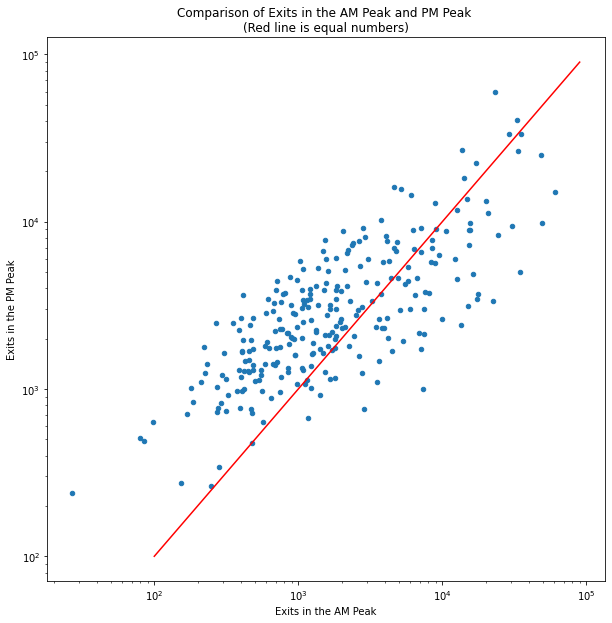

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
peak_counts.plot(kind='scatter', x='AMCount', y='PMCount', ax=ax, logx=True, logy=True)
ax.plot([100, 90000], [100,90000], 'k-', color = 'r')
_ = ax.set_title('Comparison of Exits in the AM Peak and PM Peak \n(Red line is equal numbers)')
_ = ax.set_xlabel('Exits in the AM Peak')
_ = ax.set_ylabel('Exits in the PM Peak')


This scatter plot shows that:
  1. The range of the counts is very wide, spanning from close to 100,000 down to a few hundreds. The AM and PM peaks counts are generally correlated, with busy stations (presumably in the centre of the city) at the top right of the plot and much less busy stations plotted near the bottom left.
  2. There are more stations above the red line (which shows equal AM and PM exits). These stations have more exits in the evening than in morning.
  3. The ratio of the two counts reaches approximately a factor of 10, in both directions. 

**Distributions**
Next we show the distributions of the peak count proportions and the comparison measures.

Text(0.5, 1.0, 'AM Peak Exits / PM Peak Exits')

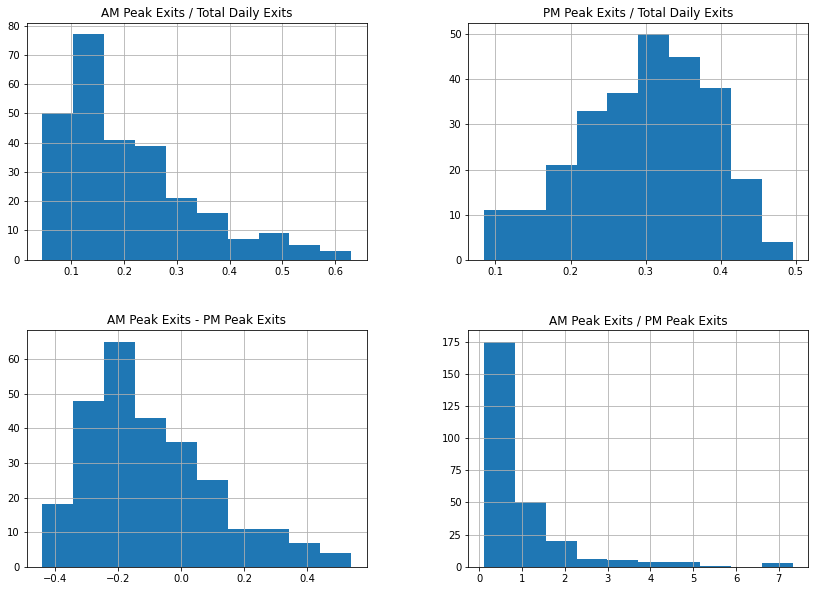

In [5]:
fig, ((a1,a2),(a3,a4)) = plt.subplots(2,2, figsize=(14,10))
peak_counts.hist(column='AMProp', ax=a1)
a1.set_title('AM Peak Exits / Total Daily Exits')
peak_counts.hist(column='PMProp', ax=a2)
a2.set_title('PM Peak Exits / Total Daily Exits')
peak_counts.hist(column='AMlessPM', ax=a3)
a3.set_title('AM Peak Exits - PM Peak Exits')
peak_counts.hist(column='AMoverPM', ax=a4)
a4.set_title('AM Peak Exits / PM Peak Exits')


The distribution of the ratio of AM peak exists to PM peak exits is very skewed. This is to be expected since a factor of 10 gives a ratio of 10 if the AM peak is larger or 0.1 if the PM peak is larger. To show the ratio more clearly, we add a variable to the data set that is the log of the ratio (equal to the difference between the log counts). The plot below shows the distribution of this variable, together with the distribution of the original ratio.

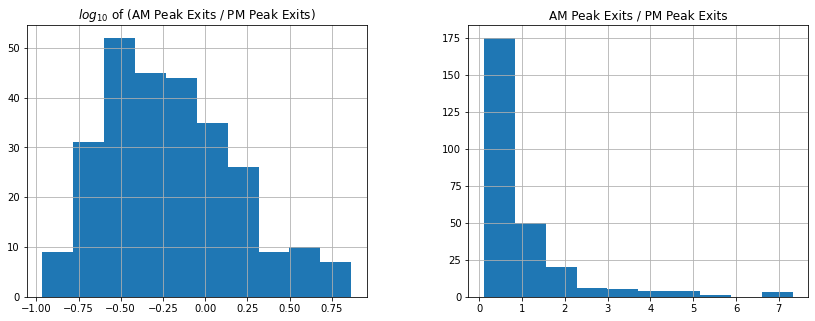

In [6]:
peak_counts = peak_counts.assign(AMoverPM_log = np.log10(peak_counts.AMProp / peak_counts.PMProp))
fig, (a1,a2) = plt.subplots(1, 2, figsize=(14,5))
peak_counts.hist(column='AMoverPM_log', ax=a1)
_ = a1.set_title('$log_{10}$ of (AM Peak Exits / PM Peak Exits)')
peak_counts.hist(column='AMoverPM', ax=a2)
_ = a2.set_title('AM Peak Exits / PM Peak Exits')

Finally, we show the summary statistics of the data.

In [7]:
peak_counts.describe()

,Total,AMCount,PMCount,AMProp,PMProp,AMlessPM,AMoverPM,AMoverPM_log
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,17194.477612,4549.768657,4477.555970,0.207132,0.298750,-0.091618,0.966229,-0.205318
std,23480.190142,8181.784059,6276.463316,0.122161,0.087724,0.203932,1.148915,0.384672
min,596.000000,27.000000,239.000000,0.045302,0.084630,-0.440373,0.108634,-0.964034
25%,4889.500000,677.500000,1471.750000,0.116120,0.240947,-0.242542,0.327530,-0.484749
50%,9210.000000,1517.000000,2622.000000,0.169378,0.307397,-0.139068,0.555720,-0.255144
75%,19999.500000,4315.250000,4707.750000,0.266443,0.361596,0.014010,1.050702,0.021466
max,149258.000000,61116.000000,59486.000000,0.630427,0.496079,0.539649,7.325050,0.864811


### Section 3.2: Analysis of Distributions

1. The AM proportion ranges between (less than) 10% and 60% with a positive skew. The median is 17% and the 75th percentile is 27%, so for most stations the proportion of exits in the AM peak is quite low. This can be explained as the underground system has many stations at the edge (spokes) and fewer in the centre (hubs).
2. The PM proportion, which ranges from 10% to 50% is more symmetrical. The median is 31%, with a possible negative skew (but not a long tail). Comparing this with the AM peak, we see that most stations have a PM peak proportion than is greater than their AM peak proportion. Again, this fits the explanation that the underground has more stations near the edge of the network and fewer in the centre and Londoners travel into the centre in the morning and return in the evening. However, a difficulty with the interpretation of this data is that the PM (or AM) proportion is reduced both by fewer exits in the PM (or AM) peak and also by greater use outside either of the peaks.   
3. The difference in proportions has a median of -14% with a positive skew. Again, this shows that more stations have a greater proportion of exits in the PM peak. 

We interpret the stations with a greater proportion of exits in the PM peak as *residential*: place from which people (daily commuters) travel to work else where. Correspondingly, the places with a greater proportion of AM exits are likely to be *work* locations. There are fewer work locations, though the stations tend to be busier. 


### Section 3.3: Exploring Groups of Stations
We can look at some of the stations with particular ranges of the difference.

**Most negative difference** Those with the most negative difference (PM exit proportion greatly exceeds AM proportion) include some stations that are at or near the end of the line.

In [8]:
peak_counts.loc[peak_counts.AMlessPM < -0.38]

,Total,AMCount,PMCount,AMProp,PMProp,AMlessPM,AMoverPM,AMoverPM_log
Station,,,,,,,,
Elm Park,5186,268,2467,0.051678,0.475704,-0.424026,0.108634,-0.964034
Grange Hill,1085,80,510,0.073733,0.470046,-0.396313,0.156863,-0.804480
Queensbury,7396,412,3669,0.055706,0.496079,-0.440373,0.112292,-0.949650
Upminster,9688,880,4647,0.090834,0.479666,-0.388832,0.189369,-0.722690


**Most Positive Difference** 2. Those with the most positive difference (PM exit proportion much less than the AM proportion) include stations in the centre of London.

In [9]:
peak_counts.loc[peak_counts.AMlessPM > 0.45]

,Total,AMCount,PMCount,AMProp,PMProp,AMlessPM,AMoverPM,AMoverPM_log
Station,,,,,,,,
Canary Wharf,87240,49620,9761,0.568776,0.111887,0.456889,5.083496,0.706162
Farringdon,37358,22651,3360,0.606323,0.089941,0.516382,6.741369,0.828748
Mansion House,11887,7369,1006,0.619921,0.084630,0.535291,7.325050,0.864811
Moorgate,55399,34925,5029,0.630427,0.090778,0.539649,6.944721,0.841655


**Intermediate** A third group is those close to balance (i.e. close to zero difference). This group is more mixed and there is a less clear pattern. 

In [10]:
peak_counts.loc[(peak_counts.AMlessPM > -0.015) & (peak_counts.AMlessPM < 0.015)]

,Total,AMCount,PMCount,AMProp,PMProp,AMlessPM,AMoverPM,AMoverPM_log
Station,,,,,,,,
Fulham Broadway,14841,3747,3701,0.252476,0.249377,0.003100,1.012429,0.005365
Gloucester Road,20631,4939,4638,0.239397,0.224807,0.014590,1.064899,0.027308
Hampstead,7286,1702,1702,0.233599,0.233599,0.000000,1.000000,0.000000
Hatton Cross,4685,1155,1133,0.246531,0.241836,0.004696,1.019417,0.008352
Kensington (Olympia),1646,247,263,0.150061,0.159781,-0.009721,0.939163,-0.027259
Kentish Town,13037,3267,3354,0.250594,0.257268,-0.006673,0.974061,-0.011414
Lambeth North,4898,1106,1065,0.225806,0.217436,0.008371,1.038498,0.016406
Liverpool Street,111897,35177,33631,0.314369,0.300553,0.013816,1.045969,0.019519
Moor Park,1584,477,477,0.301136,0.301136,0.000000,1.000000,0.000000


## Section 4: Simple Classification of Stations 

We classify stations into mainly 'work', mainly 'residental' and 'other'. They are defined as follows:
 * Work: (significantly) higher proportion of exits in the AM peak than in the PM peak
 * Residential: (significantly) higher proportion of exits in the PM peak than in the AM peak
 * Other: the proportion of exits in the AM and PM peaks are approximately equal 


### Section 4.1: Implementing a Simple Classification
We create a new variable, with values 'Work', 'Residential' and 'Other'. We use thresholds based on the quantiles of the `AMlessPM`:
  * The 'residential' classification is given to the stations with the **most negative** AM_PM_diff: less that the 45th percentile. 
  * The 'work' classification is given to the stations with the **most positive** AM_PM_diff: more than the 75th percentile. 

The use of the 45th and 75th percentile make the threshold unbalanced; this is based on the argument that there are fewer work locations that living locations. If the proportions are appropriate, we might expect the total number of AM exits in work locations to balance with the total for PM exits in residential locations. 

In [11]:
lower_limit = peak_counts.AMlessPM.quantile(0.4)
upper_limit = peak_counts.AMlessPM.quantile(0.75)

'lower limit (residential) is %3.3f and upper limit (work) is %3.3f' % (lower_limit, upper_limit)

'lower limit (residential) is -0.186 and upper limit (work) is 0.014'

We use these thresholds to classify all the stations. Some examples are shown below.

In [12]:
def classify(row):
    if row.AMlessPM < lower_limit: return 'Residential'
    if row.AMlessPM > upper_limit: return 'Work'
    return 'Other'
    
peak_counts = peak_counts.assign(Location = peak_counts.apply(classify, axis=1))
peak_counts.iloc[0:5]

,Total,AMCount,PMCount,AMProp,PMProp,AMlessPM,AMoverPM,AMoverPM_log,Location
Station,,,,,,,,,
Acton Town,9362,1970,2628,0.210425,0.280709,-0.070284,0.749619,-0.125159,Other
Aldgate,16136,7408,2992,0.459098,0.185424,0.273674,2.475936,0.393739,Work
Aldgate East,21206,7618,3803,0.359238,0.179336,0.179902,2.003155,0.301715,Work
Alperton,5118,856,1847,0.167253,0.360883,-0.193630,0.463454,-0.333993,Residential
Amersham,3905,424,1465,0.108579,0.375160,-0.266581,0.289420,-0.538472,Residential


**Properties of the Classification: Do Exits Balance?**

The peak travellers are commuters. The imaginary commuter goes from a residential location in the morning (so a AM peak exit at a work location) and then home in the evening (so a PM peak exit in a residential location). If this logic applied in full, then we expect the AM peak exit counts in work locations to be close to the PM exits in residential ones.

We find that this is not the case. It seems that not everyone who arrives at a work location in the morning peak, returns home in the evening peak.

In [13]:
'Count of AM exits in work locations = %i' % peak_counts.loc[peak_counts.Location=='Work'].AMCount.sum()

'Count of AM exits in work locations = 771284'

In [14]:
'Count of PM exits in residential locations = %i' % peak_counts.loc[peak_counts.Location=='Residential'].PMCount.sum()

'Count of PM exits in residential locations = 413506'

**Properties of the Classification: Numbers in Each Class**

We count the number in each class, showing this superimposed on a revised scatter plot.

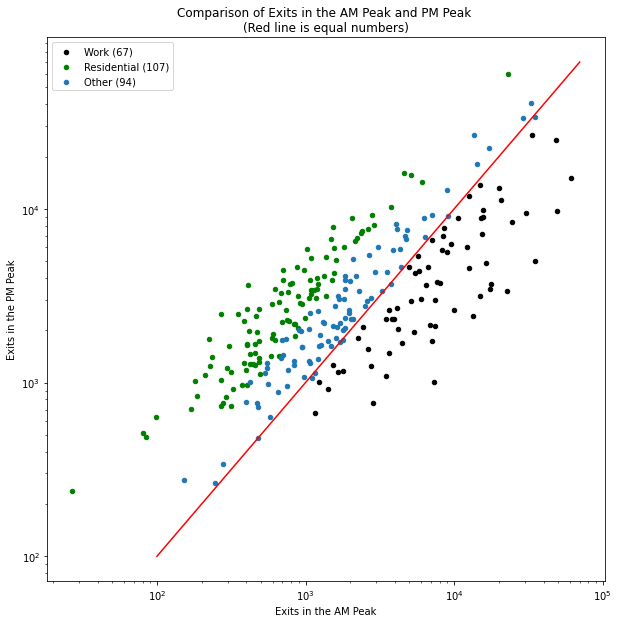

In [15]:
def scatterPlot(df): 
    fig, ax = plt.subplots(figsize=(10,10))
    nW = len(df.loc[df.Location=='Work'])
    nR = len(df.loc[df.Location=='Residential'])
    nO = len(df.loc[df.Location=='Other'])
    df.loc[df.Location=='Work'].plot(kind='scatter', x='AMCount', y='PMCount', ax=ax, logx=True, logy=True, color='black', label=('Work (%i)' % nW))
    df.loc[df.Location=='Residential'].plot(kind='scatter', x='AMCount', y='PMCount', ax=ax, logx=True, logy=True, color='g', label = ('Residential (%i)' % nR))
    df.loc[df.Location=='Other'].plot(kind='scatter', x='AMCount', y='PMCount', ax=ax, logx=True, logy=True, label = 'Other (%i)' % nO)
    ax.plot([100, 70000], [100,70000], 'k-', color = 'r')
    ax.legend()
    _ = ax.set_title('Comparison of Exits in the AM Peak and PM Peak \n(Red line is equal numbers)')
    _ = ax.set_xlabel('Exits in the AM Peak')
    _ = ax.set_ylabel('Exits in the PM Peak')

scatterPlot(peak_counts)

### Section 4.2 Application to the Northern Line Stations
Below we show the classification allocated to a selection of Northern Line stations. 

In [16]:
stations = ['Archway', 'Balham', 'Embankment', 'Goodge Street', 'Highgate', 'High Barnet',
            'Leicester Square', 'Morden', 'South Wimbledon', 'Tottenham Court Road', 'Warren Street']

for station in stations:
    print(station + ' has classification ' + peak_counts.loc[station,'Location'])

Archway has classification Other
Balham has classification Residential
Embankment has classification Work
Goodge Street has classification Work
Highgate has classification Residential
High Barnet has classification Residential
Leicester Square has classification Other
Morden has classification Residential
South Wimbledon has classification Other
Tottenham Court Road has classification Work
Warren Street has classification Work


In [17]:
peak_counts.loc[['Archway', 'Leicester Square', 'South Wimbledon'],'AMlessPM']

Station
Archway            -0.137496
Leicester Square   -0.082957
South Wimbledon    -0.119911
Name: AMlessPM, dtype: float64

**Discussion**

Most classifications seem appropriate.
* South Wimbledon might be expected to be residential; could college students be an explanation?
* All the stations classified as other have more PM exits than AM ones so perhaps the threshold should be moved. The explanation for Leicester Square may be that it is a popular nightlife location.

### Section 4.3 Finding Thresholds to Balance AM and PM Peak Exits

*Note 3: This was not asked for.*

We saw above that the idea that AM and PM exits should balance was not correct. There are many possible explanations for this: for example a proportion of workers stay on in the centre of the city after work and return outside the peak period.

However, if we wish to have a greater balance, we could search for the quantiles to use, assuming that the different of 25% between the quantiles remains for locations classified as 'other'. The code below shows that using quantiles of 58.3% for the lower limit and 83.3% for the upper limit achieves a balance. 

In [18]:
def tryQuantile(quant):
    lower_lim = peak_counts.AMlessPM.quantile(quant)
    upper_lim = peak_counts.AMlessPM.quantile(quant + 0.25)
    
    print('Quantiles %3.3f and %3.3f give exits PM %d and AM %d' 
          % (quant, quant+0.25, peak_counts.loc[peak_counts.AMlessPM < lower_lim, 'PMCount'].sum(),
             peak_counts.loc[peak_counts.AMlessPM > upper_lim, 'AMCount'].sum()))

_ = [tryQuantile(q) for q in np.arange(0.58,0.59,0.001)]

Quantiles 0.580 and 0.830 give exits PM 592928 and AM 612798
Quantiles 0.581 and 0.831 give exits PM 593814 and AM 612798
Quantiles 0.582 and 0.832 give exits PM 593814 and AM 592747
Quantiles 0.583 and 0.833 give exits PM 593814 and AM 592747
Quantiles 0.584 and 0.834 give exits PM 593814 and AM 592747
Quantiles 0.585 and 0.835 give exits PM 600506 and AM 592747
Quantiles 0.586 and 0.836 give exits PM 600506 and AM 588598
Quantiles 0.587 and 0.837 give exits PM 600506 and AM 588598
Quantiles 0.588 and 0.838 give exits PM 600506 and AM 588598
Quantiles 0.589 and 0.839 give exits PM 602610 and AM 586812
Quantiles 0.590 and 0.840 give exits PM 602610 and AM 586812


We apply these thresholds and show the classification of the selected Northern Line stations and the revised scatter plot.

Archway has classification Residential
Balham has classification Residential
Embankment has classification Other
Goodge Street has classification Work
Highgate has classification Residential
High Barnet has classification Residential
Leicester Square has classification Residential
Morden has classification Residential
South Wimbledon has classification Residential
Tottenham Court Road has classification Other
Warren Street has classification Work


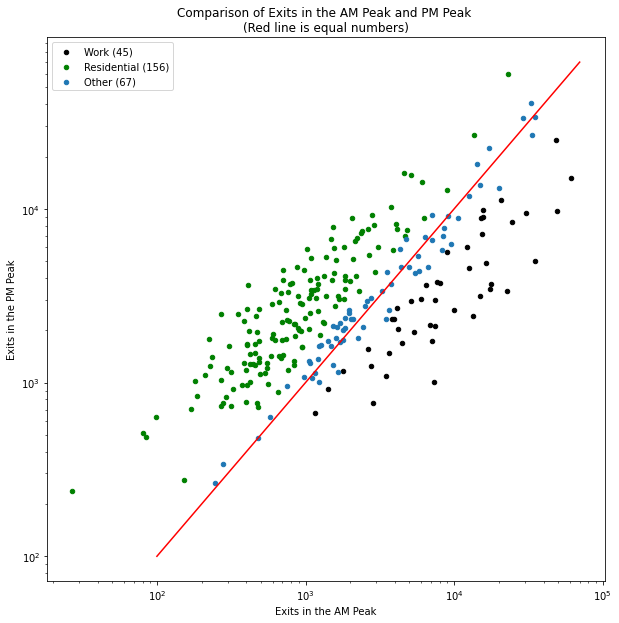

In [19]:
lower_limit = peak_counts.AMlessPM.quantile(0.583)
upper_limit = peak_counts.AMlessPM.quantile(0.833)

def classify(row):
    if row.AMlessPM < lower_limit: return 'Residential'
    if row.AMlessPM > upper_limit: return 'Work'
    return 'Other'
    
peak_counts1 = peak_counts.assign(Location = peak_counts.apply(classify, axis=1))

for station in stations:
    print(station + ' has classification ' + peak_counts1.loc[station,'Location'])

scatterPlot(peak_counts1)

### Section 4.4: Conclusions

We have chosen a single measure - the difference between the AM and PM peak exits as a proportion of the daily exits - of the different patterns of use of stations on the London Underground. In the first version, we guessed ranges of this measure to classify stations into *residential*, *work* or *other* classes. We found that the number classed as residential exceeded the number classed as work, but that the numbers of exits in the morning at work locations did not balance the number of evening exits at residential locations.

We then used the idea of balancing these exit numbers to search for a threshold (though still with an arbitrary difference between them). This increased the size of the residential class, but the classification of some examples on the Northern Line (notably Leicester Square as residential) was not convincing.

Overall, this very simple approach to the classification of stations appears to be quite successful, although a more extensive evaluation is needed. 

A limitation of the approach is that we have only considered the difference between the two peak times without considering station usage out of the peak times. A more complex approach might combine several measures and use both entry and exit data. However, we do not have *labels* for the *correct* class so that a supervised learning approach cannot be applied. We could use clustering but a more useful approach would be to combine the Underground usage data with other data on the area of each station and other modes of transport so that we could evaluate questions such as transport need in different areas.